# Part II - Prosper Loan Dataset Explanatory Analysis
## by Ibukun Ajayi

## Dataset Overview

The original dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most variables are numeric in nature, but the variables such as CreditGrade, LoanStatus, ProsperRating(Alpha), ListingCategory, Occupation, EmploymentStatus, IncomeRange, and IsBorrowerHomeowner are categorical variables.

The dataset features can be split into three main categories:

1. Borrowers data
2. Loan data
3. Credit Risk metrics

However, since we cannot explore the entire 81 variables, 16 variables of interest were pre-selected and explored. This variables include some of the borrower's information, loan data, and credit risk metric.


## Investigation Overview


This Prosper loan set comprises 81 variables, although not all of them must be evaluated. Borrowers who apply for a loan on Prosper are certain to be concerned about the Annual Percentage Rate (APR) that will be charged for the loan. Several factors influence the APR, and we plan to investigate those variables in our research. 

For this study, i identified the elements that influence the Borrower APR while giving a loan, as well as the characteristics that influence the prosper grade for borrowers. 

For the presentation, I concentrated on the impact of various variables on the interest rate, APR, and loan amount. I began by visualizing the distribution of several factors such as APR, interest rate, loan amount, loan status, and a few more.

Following that, I utilized box plots, histograms, barcharts, and line graphs to investigate the link between the selected variables (interest rate, APR, and loan amount) and the explicative factors.



## Summary of Findings

During my research, I discovered that the borrower APR is inversely connected with the original loan amount. The APR varies greatly depending on the loan amount, although the range of APR decreases as the loan amount increases. Borrower APR also reduces when the credit score improves. Borrowers who have received the highest Prosper ratings have the lowest APR. This suggests that the Prosper rating has a significant impact on borrower APR. Interestingly, when the Prosper grades are raised from HR to A or above, the link between borrower APR and loan amount shifts from negative to slightly positive.This might be due to the fact that persons with A or AA credit scores prefer to borrow more money, and increasing the APR could prohibit them from borrowing even more. People with poorer credit scores tend to borrow less money, therefore lowering the APR may encourage them to borrow more. I also discovered that for those with HR-C grades, the borrower APR decreases as the loan duration lengthens. However, for persons with B-AA credit scores, the APR rises as the loan duration lengthens.

Other insights about the borrowers that were reavealed are; 
- The state with the highest population of loan takers is **California (CA)** while **North Dakota** has the least population
- **Debt Consolidation** appears to be the most popular reason for taking loans.
- Majority of the borrowers have a job (either part time or full time) with income ranging between USD 25,000 and USD 74,999 and has a loan tenor of 36 months.
- Borrowers who are employed take out a larger loan than those who are retired or unemployed. Borrowers who are jobless pay a higher interest rate than those who are working or retired. 
-  Most borrowers Debt to Income (DTI) ratio falls betweet 20% and 35%. Lenders want a debt-to-income ratio of no more than 36% according to investopedia.

## Key Insights for Presentation

I looked at factors that predicts the borrower’s APR as well as the effect of the the borrowers' occupation and employment status on the loan amount. As suspected, the interest rate and lender yield has an effect on the APR of the borrower such that as the APR increases, the interest rate also increases. 

Furthermore, the borrower APR and the original loan amount were negatively correlated, which means that the larger the loan, the lower the APR.

It also makes sense that the borrowerAPR, rate, and lenderyield are negatively correlated to prosper score because borrowers with lower score are more likely to pay higher APR and will definitely been given the loan at a higher rate.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans=pd.read_csv('loan_dataset.csv')

## How Prosper Rating alter the relation between BorrowerAPR and Loan Amount

As the APR declines, the risk rating improves with significant increase in loan amount. Interestingly, when the Prosper grades are raised from HR to A or above, the link between borrower APR and loan amount shifts from negative to slightly positive. This might be because persons with A or AA credit scores prefer to borrow more money; increasing the APR could deter them from borrowing even more, maximizing the profit. People with poorer credit scores tend to borrow less money, therefore lowering the APR may encourage them to borrow more

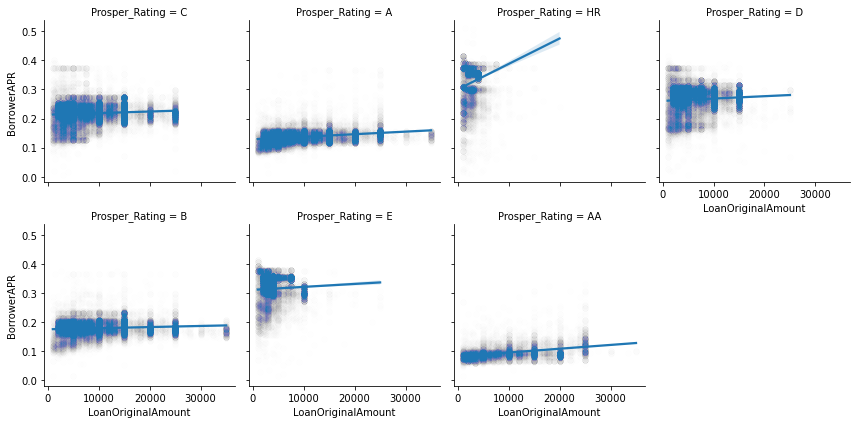

In [3]:
g = sb.FacetGrid(data = loans, col = 'Prosper_Rating', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

## The effect of employment status on the loan amount 

Borrowers who are employed have a greater loan amount when compared to borrowers from other occupational groups. Borrowers who are Retired and Not Employed, on the other hand, have taken out smaller loans when compared to other occupational groups.

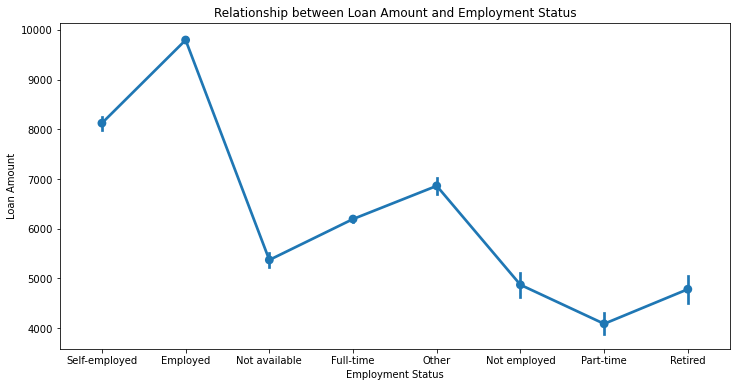

In [4]:
fig = plt.figure(figsize=(12,6))

sb.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=loans); 

plt.title('Relationship between Loan Amount and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')
plt.show()

## The distribution of Debt to Income (DTI) Ratio

The plot below shows that most borrowers DTI falls betweet 20% and 35%. Lenders want a debt-to-income ratio of no more than 36%, a low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.

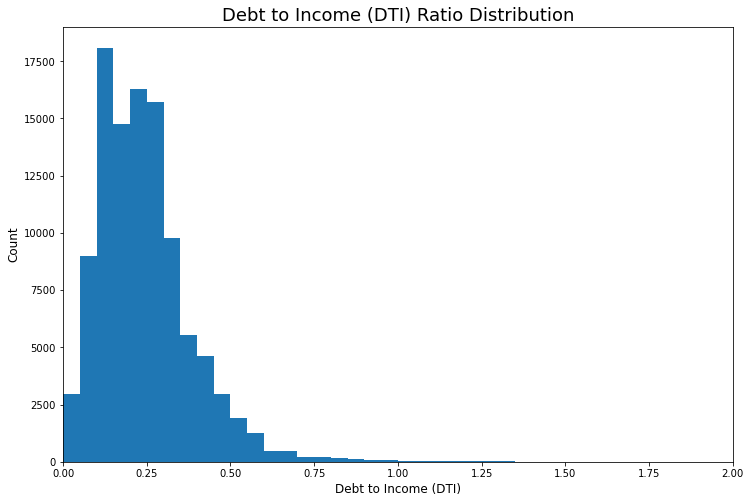

In [5]:
binsize=0.05
bins = np.arange(0, loans['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = loans, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt to Income (DTI) Ratio Distribution', fontsize=18)
plt.xlabel('Debt to Income (DTI)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0,2)
plt.show();

## How numeric variables -  'BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio', relates to categoric variables - 'LoanStatus', 'EmploymentStatus', 'Prosper_Rating'

The unemployed borrowers seems to have the highest average APR while 'full-time,' 'part-time,' and'retired' have some of the lowest. The higher the percived borrower's risk, the higher its APR.

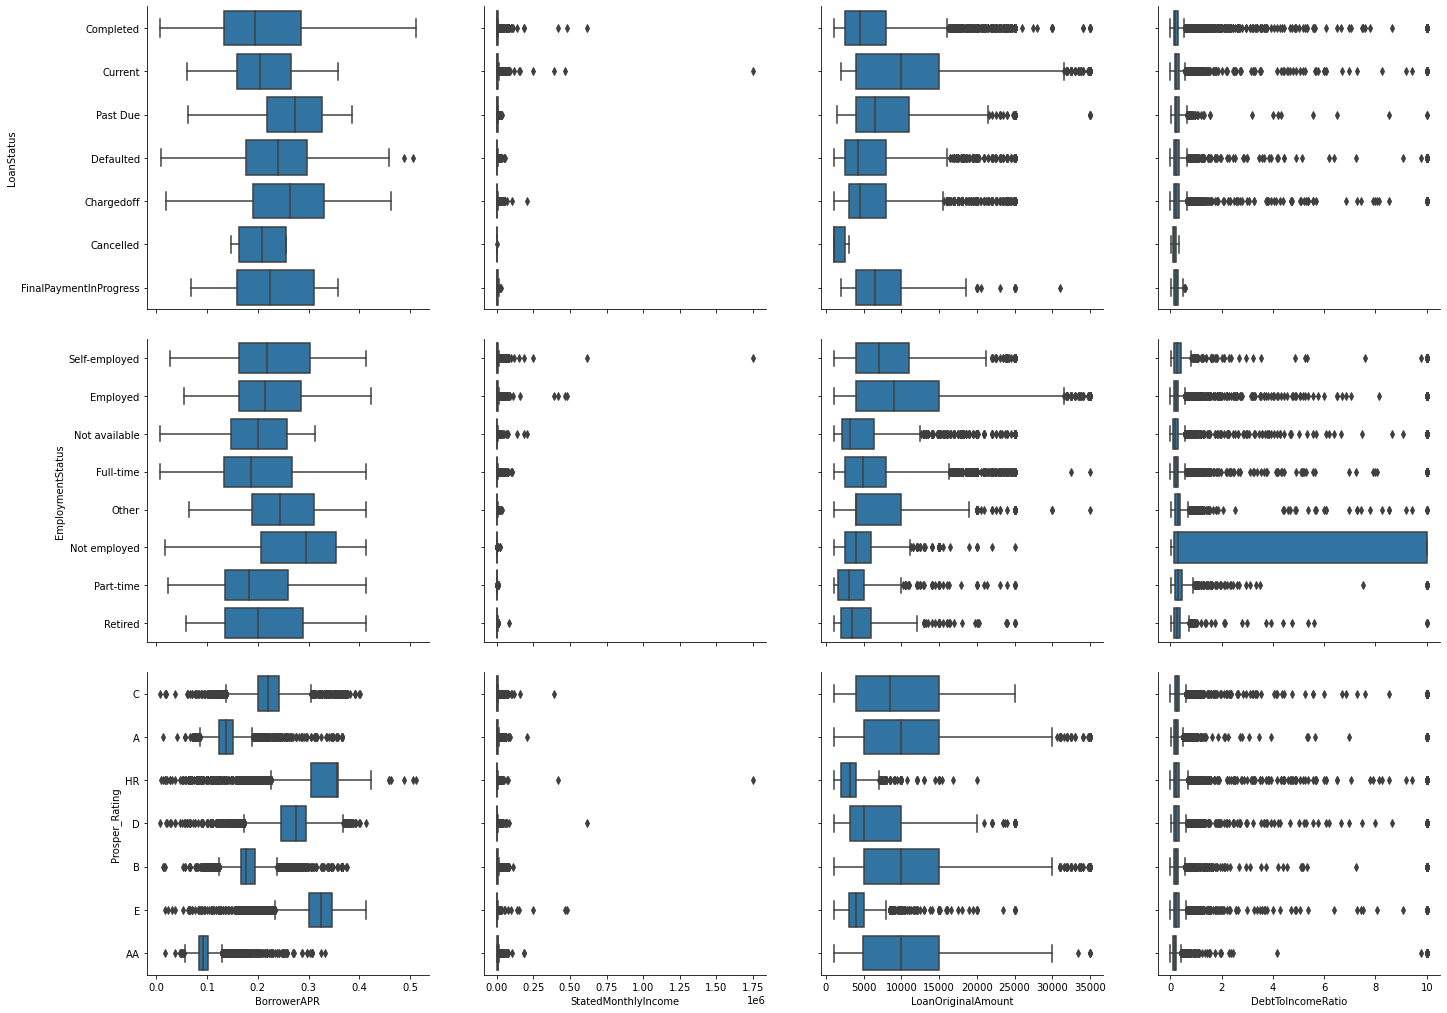

In [6]:
base_color = sb.color_palette()[0]
g = sb.PairGrid(data = loans, x_vars =['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio'],
               y_vars = ['LoanStatus', 'EmploymentStatus', 'Prosper_Rating'])
g.map(sb.boxplot, color = base_color)
g.fig.set_size_inches(20,15); # To get a better look with figure(s) bigger 

## The major income bucket from the loan listings


According to the plot, the majority of the population earns >USD50,000 followed by USD50,000 to USD74,999. Furthermore, other higher income earners have a dense population.


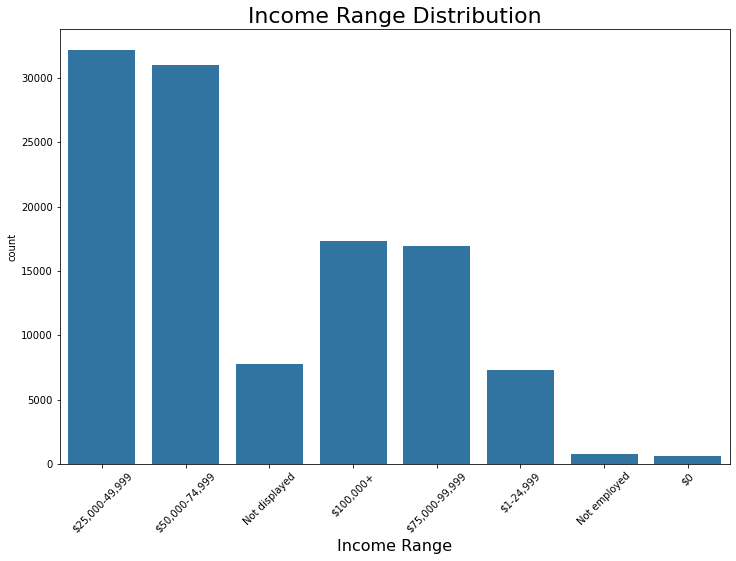

In [7]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(12,8))
sb.countplot(x='IncomeRange',data=loans,color=base_color)
plt.xticks(rotation=45)
plt.xlabel('Income Range', fontsize=16)
plt.title('Income Range Distribution', fontsize=22);

## The most common reason for taking a loan

Majority of the borrowers applied for the loan for debt consolidation. This means that loan was used for debt refinancing probably because the individuals are addressing consumer debt. It is worthy to note that this type of loan can hurt the credit score of such individuals. Another risk to the individual is that they might wind up with more debt than they start with. Although, it is a sensible financial strategy if the borrowers are tackling credit card debt. However, numerous loans were included in the Not Available and Other categories, making it difficult to tell which was the most prevalent reason for taking out a loan

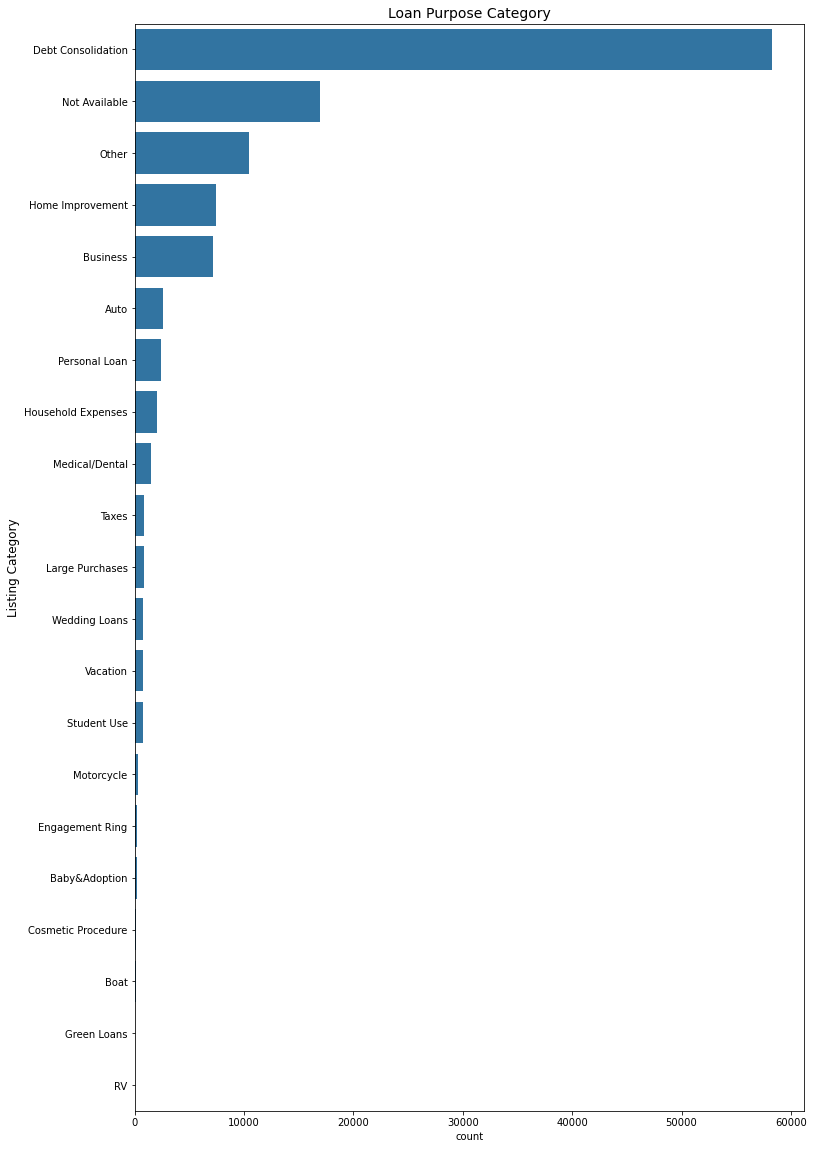

In [8]:

# Plotting for ListingCategory
colors = sb.color_palette()[0]

plt.figure(figsize=[12, 20])

cat_order=loans['ListingCategory'].value_counts().index

sb.countplot(data=loans, y='ListingCategory', order=cat_order, color=colors)
plt.title('Loan Purpose Category', fontsize=14)
plt.ylabel('Listing Category', fontsize=12);

##  States with the most and least number of borrowers 

The top 3 states with the highest number of borrowers are **California, Texas, and New York** while **North Dakota, Maine, and Wyoming** are the states with the least number of borrower. There could be a trend here, questions such as what are the factors that makes the loan attractive in a particular location over the other, why is the population in a particular location more than the others arises from this distribution. But due to limited data, we might not be able to dig too deep into this particular analysis.

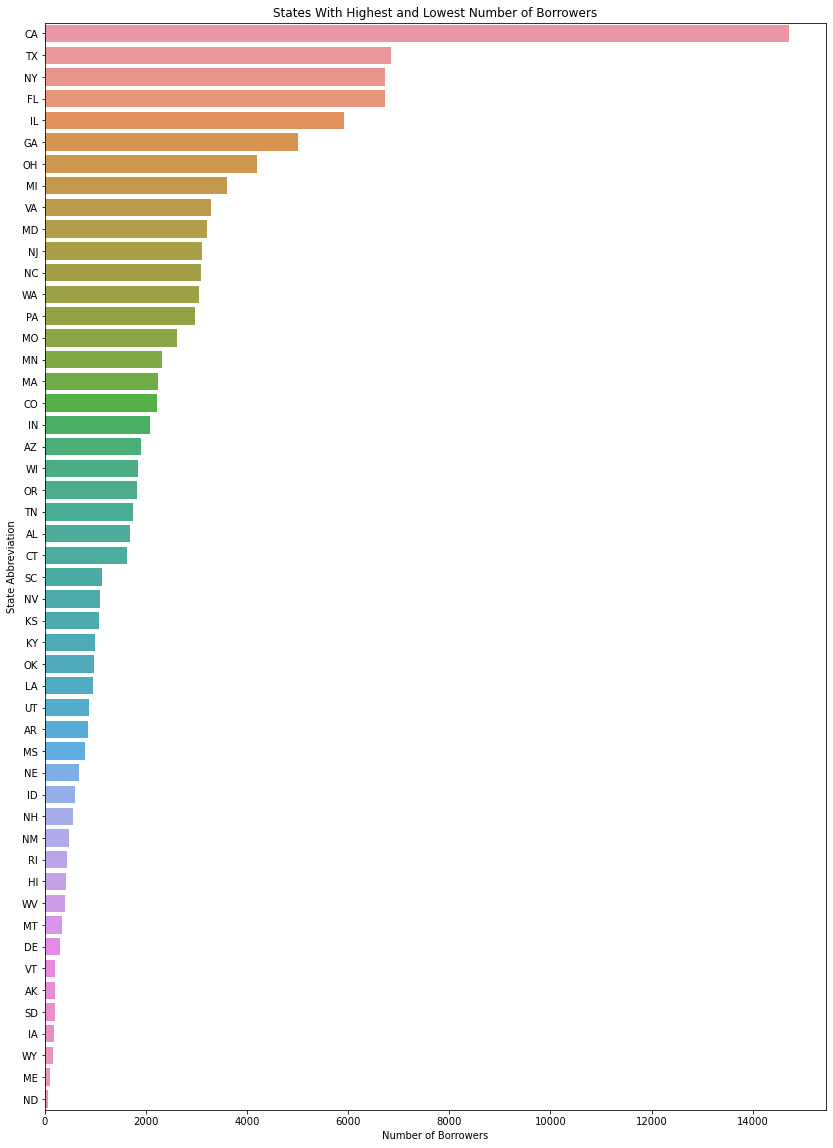

In [9]:
state_list = loans['BorrowerState'].value_counts().index.tolist()
state_count = loans['BorrowerState'].value_counts().values.tolist()


f,(ax) = plt.subplots(sharey=False, sharex=False, figsize=(14, 20))

sb.barplot(x=state_count, y=state_list)
ax.set_title('States With Highest and Lowest Number of Borrowers')
ax.set_xlabel('Number of Borrowers')
ax.set_ylabel('State Abbreviation')
plt.show()

## The most common loan tenor

Observation shows that over 80,000 borrowers' loan were approved on 36 months loan term, 24545 on 60 months and less than 2,000 on 12 months

36    87778
60    24545
12     1614
Name: Term, dtype: int64


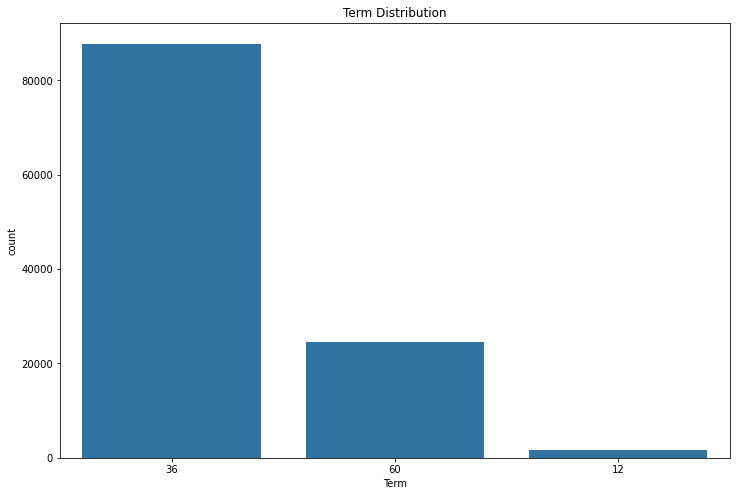

In [10]:
print(loans['Term'].value_counts());

# we take a look at the Loan term distribution
colors = sb.color_palette()[0]

# Order the categorical variable 
Term_order=loans.Term.value_counts().index


plt.figure(figsize=[12, 8])


sb.countplot(data = loans, x = 'Term', order = Term_order, color = colors);
plt.title('Term Distribution')
plt.xlabel('Term');

## The effect of the borrowerAPR has on the ProsperScore

There is a correlation between the APR and the ProsperScore. The better your risk rating, the lower the APR you'll receive. This seems logical because persons with better ratings are more dependable and hence have lower BorrowerAPR.

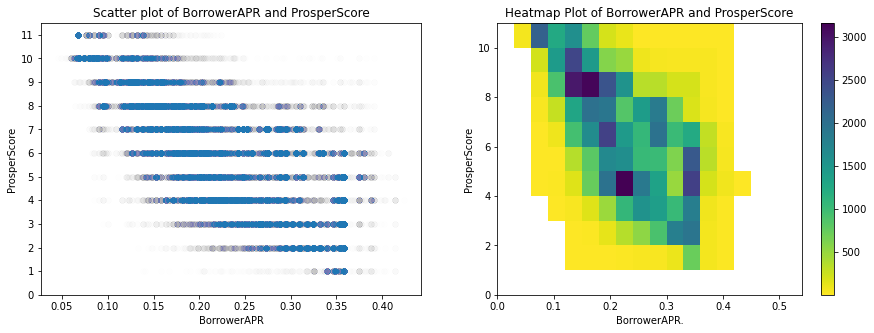

In [11]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loans['ProsperScore'].max()+1, 1)
plt.hist2d(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('Heatmap Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR.')
plt.ylabel('ProsperScore');

In [1]:
!jupyter nbconvert Part_II_slide_deck_Prosper_Loan_Dataset.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Prosper_Loan_Dataset.ipynb to slides
[NbConvertApp] Writing 1048045 bytes to Part_II_slide_deck_Prosper_Loan_Dataset.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Ibukun\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Ibukun\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Ibukun\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Ibukun\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Ibukun\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.con